In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Connecting Models and Data

#### Version 0.1

-----

By AA Miller (Northwestern/CIERA)

14 Sep 2022

A fundamental truth about the DSFP...

$~~~~~$ *Statistics* is an entire field...

$~~~~~$ It is impossible to cover everything in a single week

Our field, astronomy, is driven by observations. 

To narrow the scope for this session $\longrightarrow$ we will largely be focused on **data** and **models**.

This leads to one of my favorite questions in the DSFP:

What is data?

There are philosphical aspects to this question, but, in astronomy, data typically come from measurements. 

Measurements are *constant*.

This notion probably seems weird, but it is true. In pixel $ij$ the detector measures 2647 counts. That measurement/value/data point cannot change.

Note – **all** measurements come with uncertainties. 

Analysis should account for these uncertainties. 

There are some methods that may be useful (e.g., some forms of machine learning) that are not designed to take uncertainties as input. These are not invalid, but one should always be careful in the interpretation of their results. 

What is a model?

Models are constructed to explain data. We generally use models for one of two purposes: 

*forecasting*

and

*inference*.

Forecasting is about predicting the outcome of some future, as of yet, unobserved event. 

This can be extremely useful if you have measured the velocity dispersion of some galaxy and you would like to know the mass of the black hole at the center of that galaxy.

Inference is about understanding the fundamental relationship between different parameters. Inference can be used for forecasting (the otherway around isn't always true). 

Inference is necessary for understanding physics.

While the following statement can be incredibly useful, "based on 10 measurements of a force applied to this ball, I predict that a newly applied force, $F_\mathrm{new}$, will produce acceleration $F_\mathrm{new}/m_\mathrm{ball}$," it is far more useful to say $F = ma$ for any object with mass $m$.

The focus of this lecture, and essentially the rest of this session, is on building models.

## Problem 1) Model Building Basics

Consider the following data:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/data.png" width="550" align="middle">

**Break Out Question 1**

What can you infer about these data?

*Take a moment to discuss with your partner*

Technically, we can infer very little without more information. 

What is $x$? What is $y$? How was the data collected? etc

(The answer is at the very end of this notebook, because these data were generated via a number of different random number generators)

We will nevertheless suppose that there is an underlying linear relationship between $x$ and $y$.

This means we can construct a model to explain the data.  

**Break Out Question 2**

What is the best-fit model explaining the relationship between $x$ and $y$? 

*Take a moment to discuss with your partner*

When I was first taught statistics, we spent a lot of time on the "guess and check" method.

Essentially guess a solution, measure the quality of that solution (or more often than not, just eyeball it), and update the guess as necessary.

By that metric here's a reasonable guess: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/guess.png" width="550" align="middle">

Is that the "best-fit" model? Almost certainly not! 

Numerical measures should be used to estimate what is best. 

Perhaps it is best to minimize the sum of the (absolute value) of the residuals. 

This is also referred to as the L1 norm. 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/L1norm.png" width="550" align="middle">

Or maybe we should minimize the sum of the square of the residuals (the L2 norm):

<img style="display: block; margin-left: auto; margin-right: auto" src="images/L2_norm.png" width="550" align="middle">

For this data set the "best-fit" from minimizing the residuals and minimizing the square of the residuals have a nearly identical slope, but very different intercept values. 

Minimizing the square of the residuals gives more weight to observations with large residuals, so the line moving "down". 

What about the residuals raised to the 100$^\mathrm{th}$ power?

<img style="display: block; margin-left: auto; margin-right: auto" src="images/L100_norm.png" width="550" align="middle">

Wait, this entire time we have been ignoring the uncertainties!

What if we minimize the square of the residuals divided by the uncertainties (sometimes referred to as the $\chi^2$)?

This effectively downweights observations with large residuals if the uncertainties are also correspondingly large.

<img style="display: block; margin-left: auto; margin-right: auto" src="images/minChi2.png" width="550" align="middle">

Is the best-fit just the actual relationship between $x$ and $y$? 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/true.png" width="550" align="middle">

Which of these is "best"?

*Hint* – do we ever know the true relationship in nature?

## Problem 2) The Likelihood

Building on this morning's lecture, we can use probability theory to build some notion of what model is best. 

If our measurements follow some known (or assumed) behavior, then we can write down the probability of observing any given value as a function of our model $\mathcal{M}$, which depends upon model parameters $\theta$

$$p(x|\mathcal{M}(\theta))$$

In the special, and oft-assumed, case where this probability distribution is Gaussian, then: 

$$p(x|\mathcal{M}(\theta)) = \frac{1}{\sqrt{(2\pi\sigma^2)}} \exp\left(- \frac{(x - \mu)^2}{2\sigma^2}\right),$$

where $\mu$ is the mean and $\sigma^2$ is the variance of the model.

If individual observations are independent, (i.e., there is no correlation in successive observations) then we can define the likelihood $\mathcal{L}$ of all observations $x_i$ as the product of the individual observation probabilities: 

$$\mathcal{L} \equiv \prod_{i=1}^{N} p(x_i|\mathcal{M}(\theta))$$

Note that $\mathcal{L}$ is not a true probability distribution function (p.d.f.), it is the product of several probabilities drawn from a p.d.f. $\mathcal{L}$ is not normalized and often is a very small number.

Again, for the special case that the individual observations follow a Gaussian p.d.f., the likelihood is

$$\mathcal{L} = p(x_i|\mathcal{M}(\theta)) = \prod_{i=1}^N \frac{1}{\sqrt{(2\pi\sigma_i^2)}} \exp\left(- \frac{(x_i - \mu)^2}{2\sigma_i^2}\right),$$

where the $\sigma_i$ represents heteroskedastic uncertainties on the individual observations $x_i$. 

Because $\mathcal{L}$ is typically very small, it is numerically easier to work with the log of the likelihood, which can be written as:

$$\ln \mathcal{L} =  -\frac{N}{2} \ln\left(\frac{1}{2\pi}\right) - \sum_{i=1}^{N} \ln \sigma_i - \sum_{i=1}^N \left(\frac{(x_i - \mu)^2}{2\sigma_i^2}\right).$$

The first two terms in this equation are constant, meaning: 

$$\ln \mathcal{L} \propto - \sum_{i=1}^N \left(\frac{(x_i - \mu)^2}{2\sigma_i^2}\right).$$


Ultimately, the "best" model is the one that maximizes the likelihood. 

(maximizing the likelihood and the log of the likelihood is equivalent)

For some observations ${x_i}$ that are fixed and unchanging (remember - the data are *constants*), the likelihood is then a function of the model parameters $\theta$.

Maximizing the likelihood therefore requires a choice of model parameters that "best" explain the data. 

## Problem 3) Frequentist statistics

There are two fundamental approaches to statistical inference: frequentist and Bayesian statistics. 

Philosophically these approaches differ, but I want to emphasize that neither is wrong. 

As is true for most everything in data science, the particulars of the problem determine which approach is best. 

There are three tenets for frequentist statistics:

$~~~~~~$ Probabilities are relative frequencies of events.

$~~~~~~$ Parameters are fixed, unknown constants. 

$~~~~~~$ Statistial procedures should have well-defined long run frequency properties.

(The difference between frequentist and Bayesian methods merits a lengthy discussion. Time prohibits that discussion during this lecture, but I strongly encourage you to bring this up with other people during breaks this session)

## Problem 4) Maximum Likelihood Estimation

To estimate a likelihood we must formulate a model to describe how the data were generated. 

The model parameters that maximize the likelihood form the "best" estimate for those parameters. 

For very simple problems it may be possible to differentiate the likelihood and determine its maximum analytically, but this is rarely the case.

Instead, numerical methods are typically adopted.

Maximizing the likelihood is equivalent to minimizing the negative log likelihood. 

A standard way of doing this is with the [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html?highlight=minimize) function inside the `scipy.optimize` module.

(the best way to minimize a function is by taking derivatives, but sometimes that is not possible. There are multiple numerical methods to address this, many of them options for the `minimize` function. The [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) algorithm is the default.)

One caveat to all numerical methods to solve this problem: there are no guarantees about converging to a *global* minimum. 

There is always a risk that the algorithm only found a local minimum.

One nice aspect of the Gaussian likelihood, is that we can recast $\ln \mathcal{L}$ in terms of the $z$-score, $z_i = (x_i - \mu)/\sigma_i$: 

$$\ln \mathcal{L} = \mathrm{constant} - \frac{1}{2} \sum z_i^2$$

This sum is often referred to as the "$\chi^2$" ($\chi^2 = \sum z_i^2$). 

(if you have ever heard that the "best" model minimizes the $\chi^2$, this is where it comes from: maximizing a Gaussian likelihood)

This means the distribution of $\ln \mathcal{L}$ can be determined from the $\chi^2$ distribution with $N - k$ degrees of freedom, where $k$ is the number of model parameters. 

(we will cover common distributions in more detail tomorrow, briefly, the sum of the squares of the $z$-score, $Q = \sum z_i^2$, follows a $\chi^2$ distribution with $k = N$ degrees of freedom, 

$$p(Q|k) \equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2 -1} \exp(-Q/2),$$

where $Q$ must be greater than zero and $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function). 

<IPython.core.display.Javascript object>


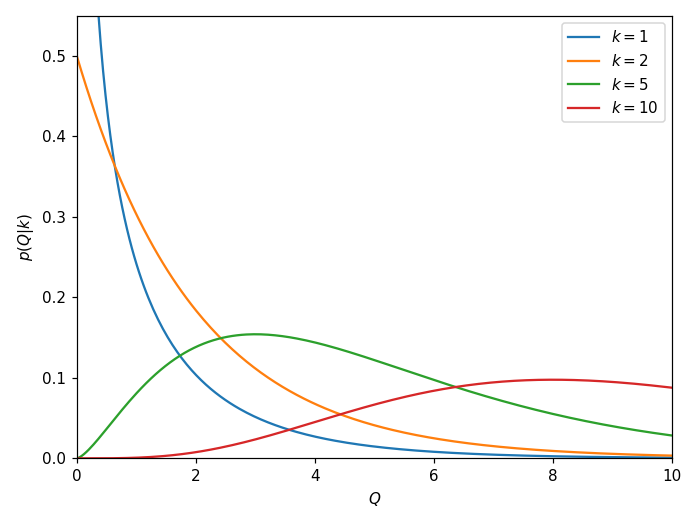

In [135]:
from scipy import stats

fig, ax = plt.subplots()
for dof in [1, 2, 5, 10]:
    dist = stats.chi2(dof)
    grid = np.linspace(0,10,250)
    p = dist.pdf(grid)
    ax.plot(grid, p, label=f'$k = {dof}$')

ax.set_xlabel('$Q$')
ax.set_ylabel('$p(Q|k)$')
ax.set_ylim(0,0.55)
ax.set_xlim(0,10)
ax.legend()

fig.tight_layout()

It is often possible to improve the likelihood by adding additional parameters to a model (e.g., 20 observations can be "perfectly" matched by a 19$^\mathrm{th}$ order polynomial). 

For this reason, it is often convenient to define the $\chi^2$ per degree of freedom:

$$\chi_\mathrm{dof}^2(Q|k) \equiv \chi^2(Q|k)/k$$

The mean of $\chi_\mathrm{dof}^2$ is 1. Models with $\chi_\mathrm{dof}^2 \gg 1$ are either underfit or have significantly underestimated the uncertainties, while models with $\chi_\mathrm{dof}^2 \ll 1$ are either overfit or have overestimated the uncertainties. 

We have now defined a numerical measure for the goodness of fit. Generally speaking, models with $\chi^2_\mathrm{dof} \approx 1$ are "good" while those that are not are bad. 

Two caveats: (1) outliers, even a single spurious observation, will have a significant effect on $\chi^2$ and provide a strong influence on any conclusions/comparisons derived from $\chi^2$, (2) the derived $\chi_\mathrm{dof}^2$ alone is not a sufficient metric to determine "best." The distribution of $\chi^2$ depends on the dof, so the significance of $\chi_\mathrm{dof}^2 = 1.1$ is very different for 10 vs. 1851 degrees of freedom (formally the later is not a particularly good fit for truly Gaussian uncertainty distributions). 

While $\chi^2_\mathrm{dof}$ can be used to compare models, the penalty for adding additional terms to the model is often too small. 

A classical method for model comparison using frequentist statistics is the [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion). 

The AIC is computed as:

$$\mathrm{AIC} \equiv -2 \ln \mathcal{L} + 2k + \frac{2k(k+1)}{N - k -1}$$

and models with the smallest AIC are preffered. 

If two models produce identical likelihoods, then the model with fewer parameters "wins."

(this was a hopelessly brief discussion, there will be more on model selection later this week)

## Problem 5) Closing Thoughts on Models

In this lecture, I wanted to connect data and models.

Whatever statistical philosophy you prefer, I **strongly** encourage you to use a likelihood to make this connection. 

We also began a discussion about model comparison, and how to select a preferred model given some data set. 

Now in parting, a question that may bother you: what is the probability of some selected model $\mathcal{M}$ given the infinite set of possible models ${\mathcal{M_i}}$?

$$p(\mathcal{M}|{\mathcal{M_i}}) = ???$$

This is an intractable problem.

In other words, a single model can be identified as superior to others, but it can never definitively be shown to be "right".

(I hope this doesn't disrupt your sleep tonight)

## Appendix

The production of plots in this lecture was done the with software listed below. 

In [85]:
# set up the random data that will be fit
np.random.seed(2009)
rng = np.random.default_rng(seed=2009)

n_obs = 23
frgd_bkgd = rng.uniform(0, 1, n_obs)
bkgd = rng.uniform(100, 125, n_obs)*np.sign(rng.uniform(-1,1,n_obs))
x_obs = rng.uniform(0, 100, n_obs)

# slope and intercept of the generating process
m_true = 1.7
b_true = 25

unc = rng.normal(20, 4, n_obs)
scatter = np.where(frgd_bkgd > 0.2, rng.normal(0, unc), bkgd)

y_obs = m_true*x_obs + b_true + scatter
y_unc = unc*0.83

<IPython.core.display.Javascript object>


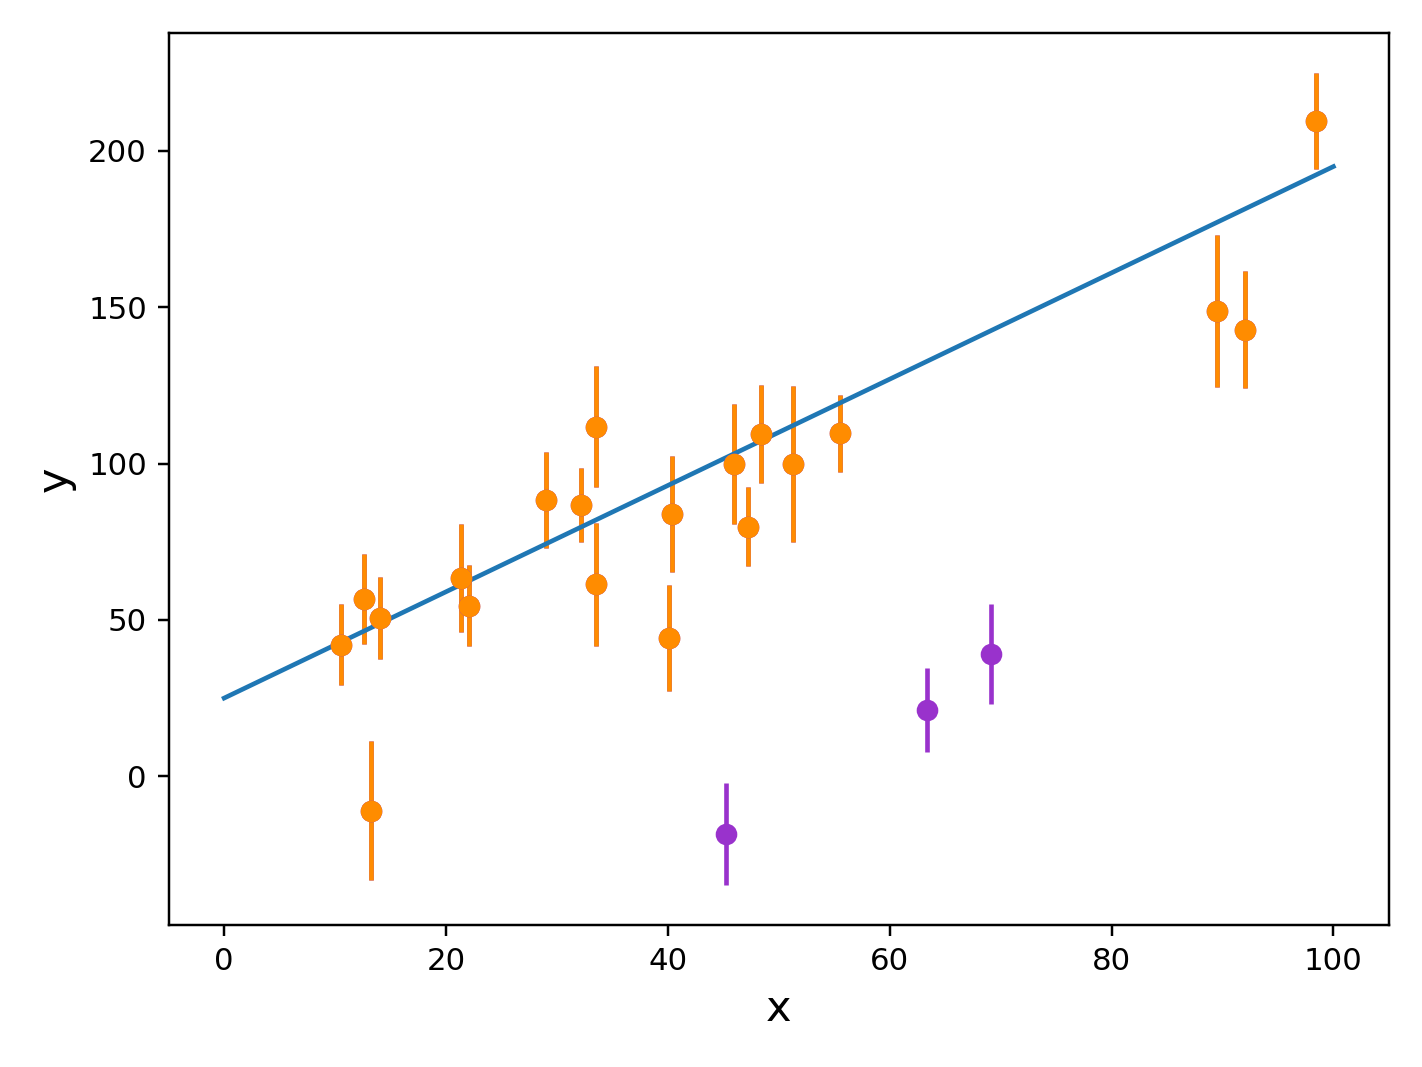

In [90]:
fig, ax = plt.subplots()
ax.errorbar(x_obs, y_obs, y_unc, fmt='o', color='DarkOrchid')
ax.errorbar(x_obs[np.where(frgd_bkgd > 0.2)], 
            y_obs[np.where(frgd_bkgd > 0.2)], 
            y_unc[np.where(frgd_bkgd > 0.2)], fmt='o', color='DarkOrange')
ax.plot([0,100], [b_true, b_true + 100*m_true])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.tight_layout()

<IPython.core.display.Javascript object>


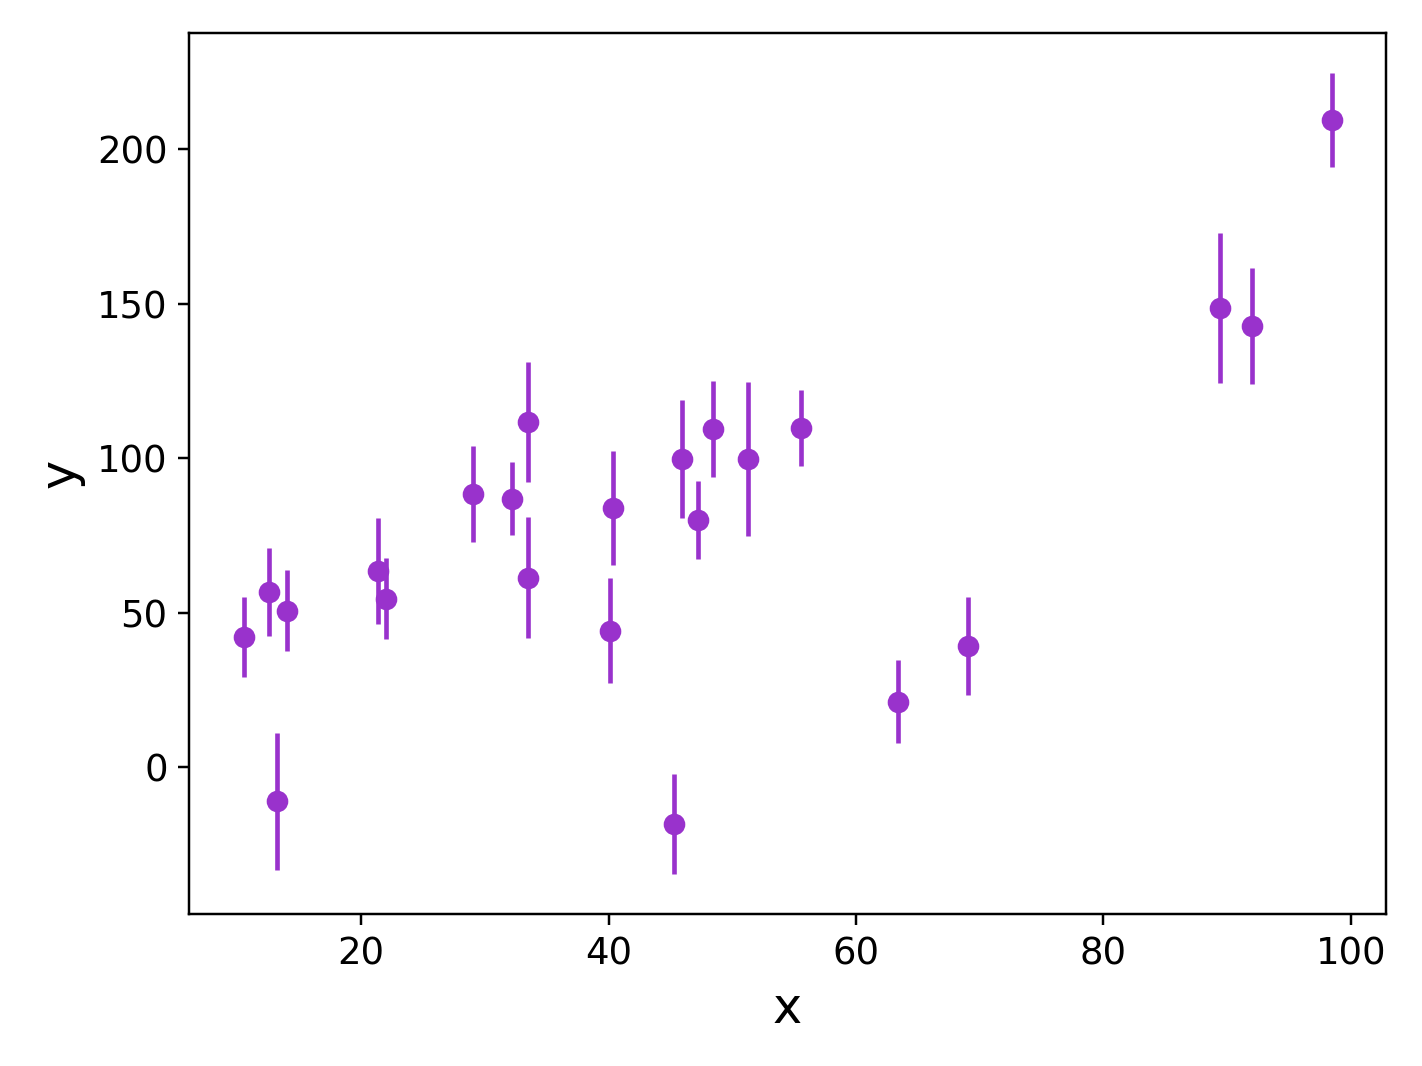

In [124]:
fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')
m_guess, b_guess = 1.82, 7
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/data.png')

<IPython.core.display.Javascript object>


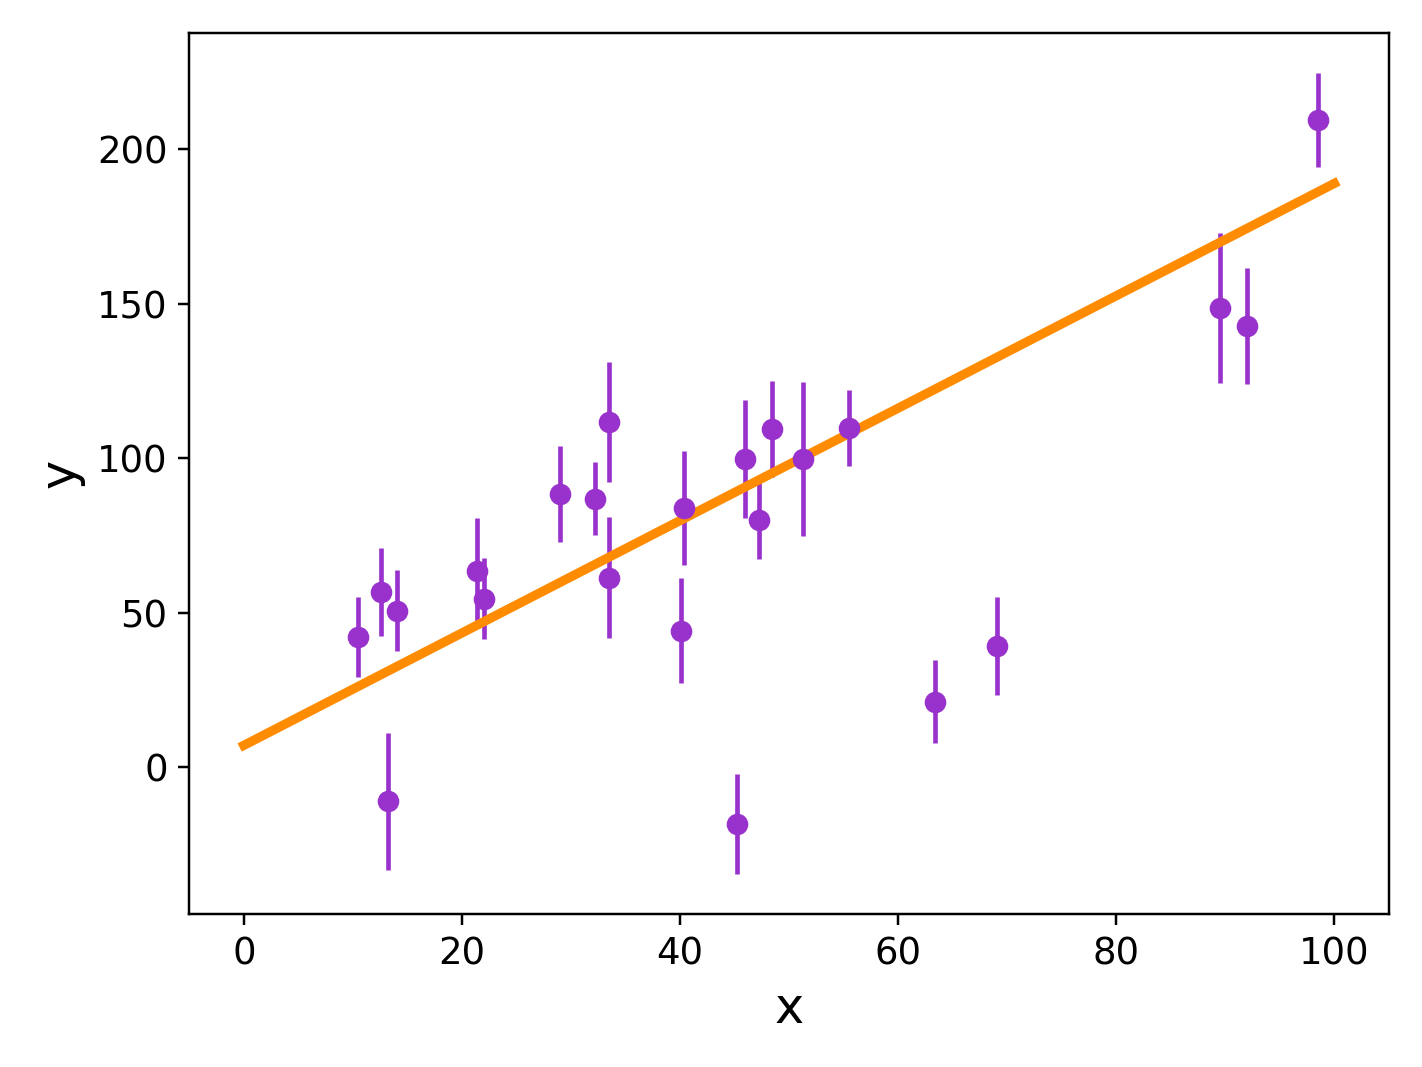

In [123]:
fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')
m_guess, b_guess = 1.82, 7
ax.plot([0,100], [b_guess, b_guess + 100*m_guess],
        color='DarkOrange', lw=3)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/guess.png')

<IPython.core.display.Javascript object>


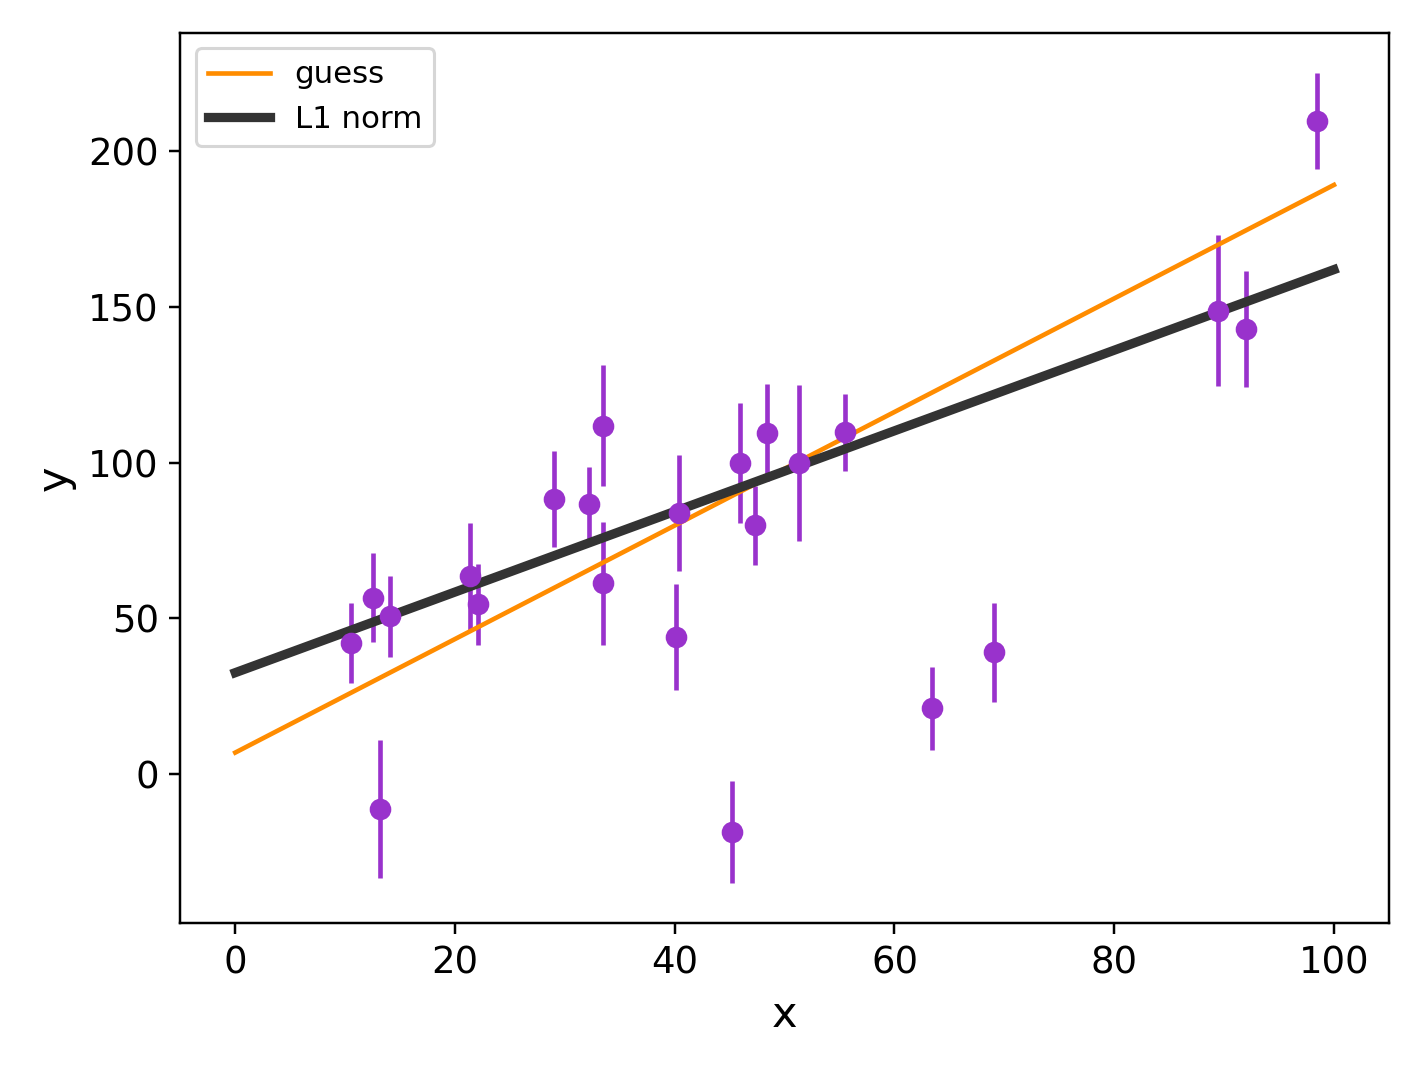

In [126]:
from scipy.optimize import minimize

# calculate L1 norm
def l1(theta, x, y):
    m, b = theta
    return sum(np.abs(y - (m*x + b)))

res_l1 = minimize(l1, (1, 20), (x_obs, y_obs))

fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')
ax.plot([0,100], [b_guess, b_guess + 100*m_guess], 
        color='DarkOrange', label='guess')
ax.plot([0,100], [res_l1.x[1], res_l1.x[1] + 100*res_l1.x[0]], 
        color='0.2', label='L1 norm', lw=3)

ax.legend(fancybox=True)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/L1norm.png')

<IPython.core.display.Javascript object>


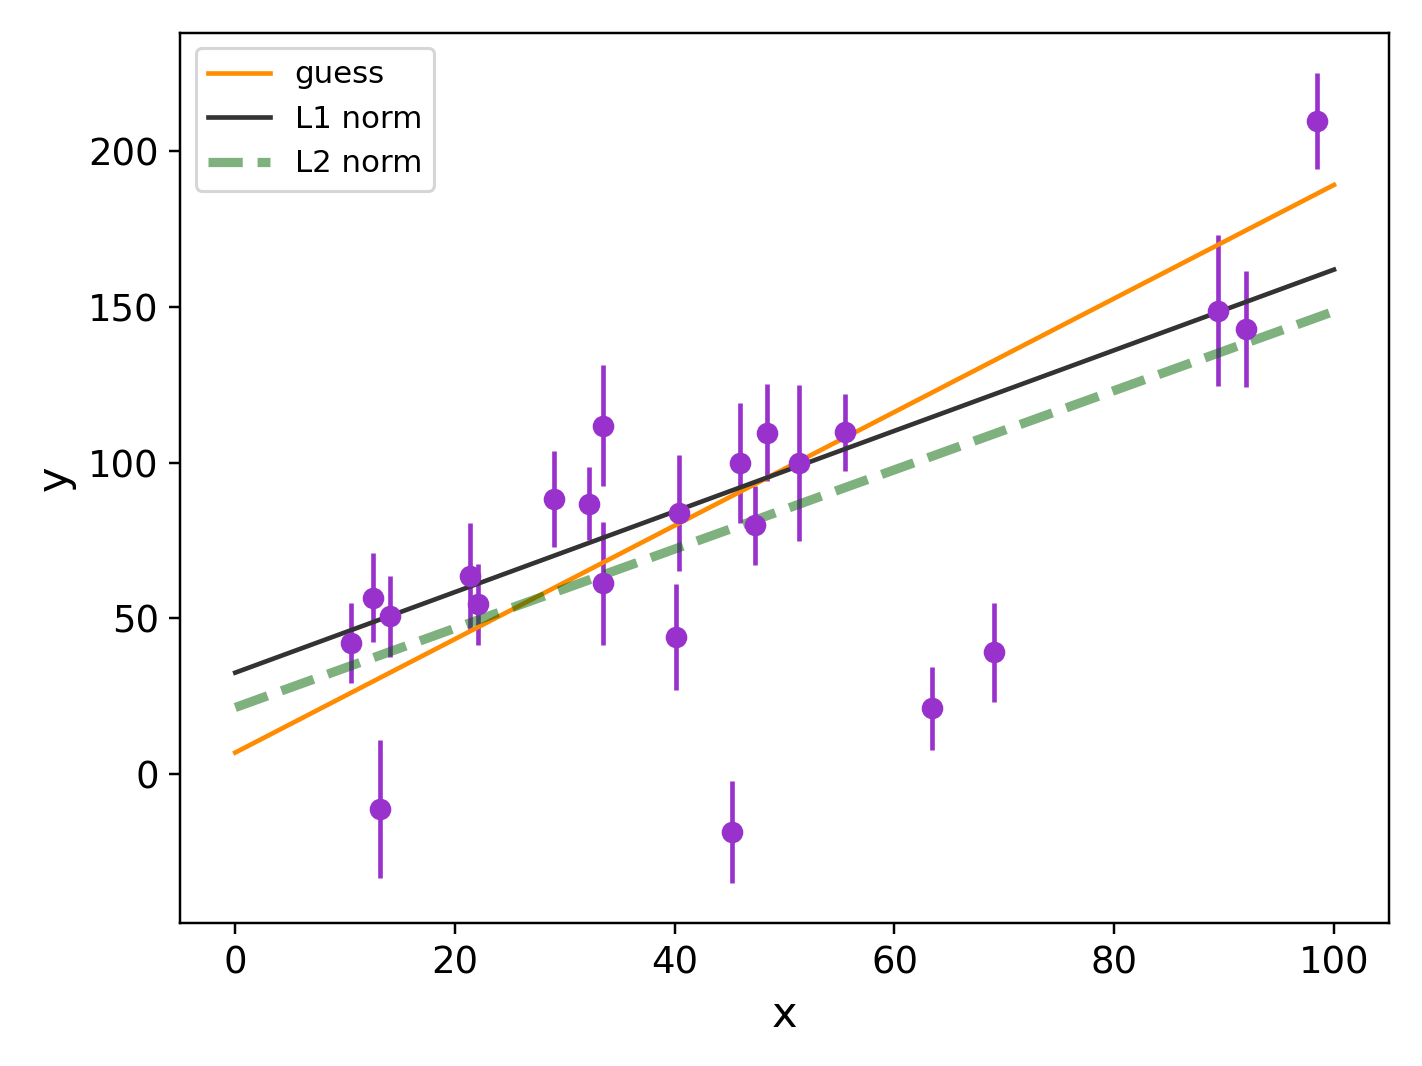

In [127]:
# calculate L2 norm
def l2(theta, x, y):
    m, b = theta
    return sum(np.abs(y - (m*x + b))**2)

res_l2 = minimize(l2, (1, 20), (x_obs, y_obs))

fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')

ax.plot([0,100], [b_guess, b_guess + 100*m_guess], 
        color='DarkOrange', label='guess')
ax.plot([0,100], [res_l1.x[1], res_l1.x[1] + 100*res_l1.x[0]], 
        color='0.2', label='L1 norm')
ax.plot([0,100], [res_l2.x[1], res_l2.x[1] + 100*res_l2.x[0]], 
        color='DarkGreen',ls='--', alpha=0.5, label='L2 norm', lw=3)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend()
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/L2_norm.png')

/Users/adamamiller/opt/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/optimize/linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/var/folders/zz/p6mrlg9s0_55w0tqv7zv1j840000gn/T/ipykernel_2190/136483480.py:4: RuntimeWarning: overflow encountered in power
  return sum(np.abs(y - (m*x + b))**100)
/Users/adamamiller/opt/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/adamamiller/opt/miniconda3/envs/DSFP/lib/python3.8/site-packages/scipy/optimize/linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/var/folders/zz/p6mrlg9s0_55w0tqv7zv1j840000gn/T/ipykernel_2190/136483480.py:4: RuntimeWarning: overflow encountered in power
  return sum(np.abs(y - (m*x + b))**100)


<IPython.core.display.Javascript object>


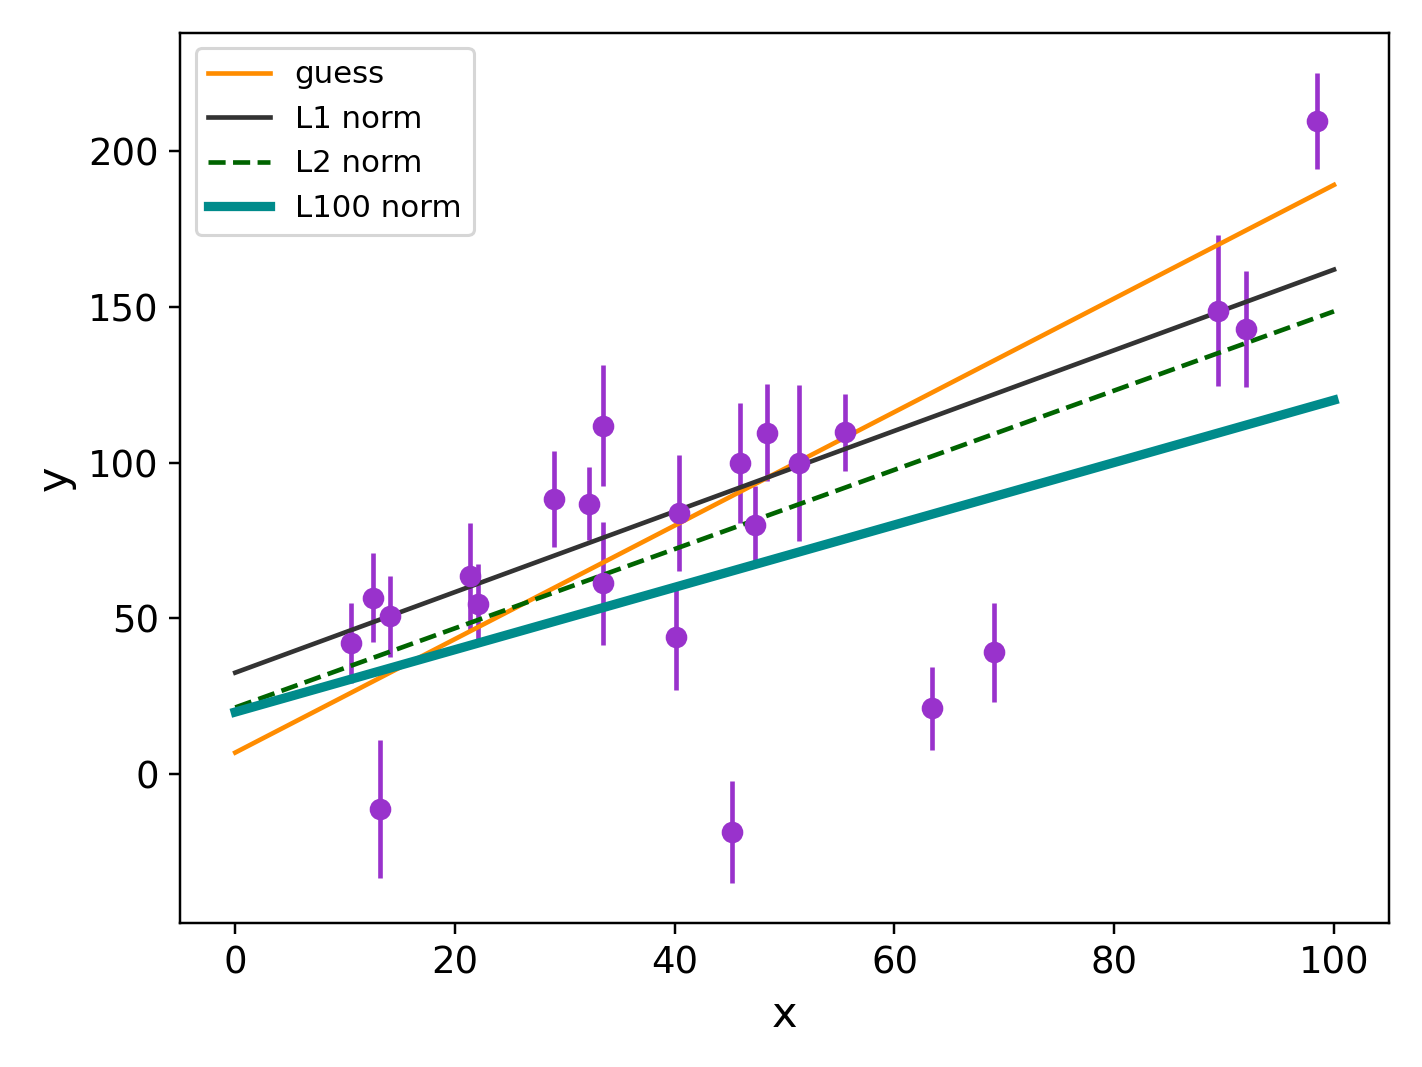

In [129]:
# calculate L100 norm
def l100(theta, x, y):
    m, b = theta
    return sum(np.abs(y - (m*x + b))**100)

res_l100 = minimize(l100, (1, 20), (x_obs, y_obs))

fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')

ax.plot([0,100], [b_guess, b_guess + 100*m_guess], 
        color='DarkOrange', label='guess')
ax.plot([0,100], [res_l1.x[1], res_l1.x[1] + 100*res_l1.x[0]], 
        color='0.2', label='L1 norm')
ax.plot([0,100], [res_l2.x[1], res_l2.x[1] + 100*res_l2.x[0]], 
        color='DarkGreen',ls='--', label='L2 norm')
ax.plot([0,100], [res_l100.x[1], res_l100.x[1] + 100*res_l100.x[0]], 
        color='DarkCyan', label='L100 norm', lw=3)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend()
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/L100_norm.png')

<IPython.core.display.Javascript object>


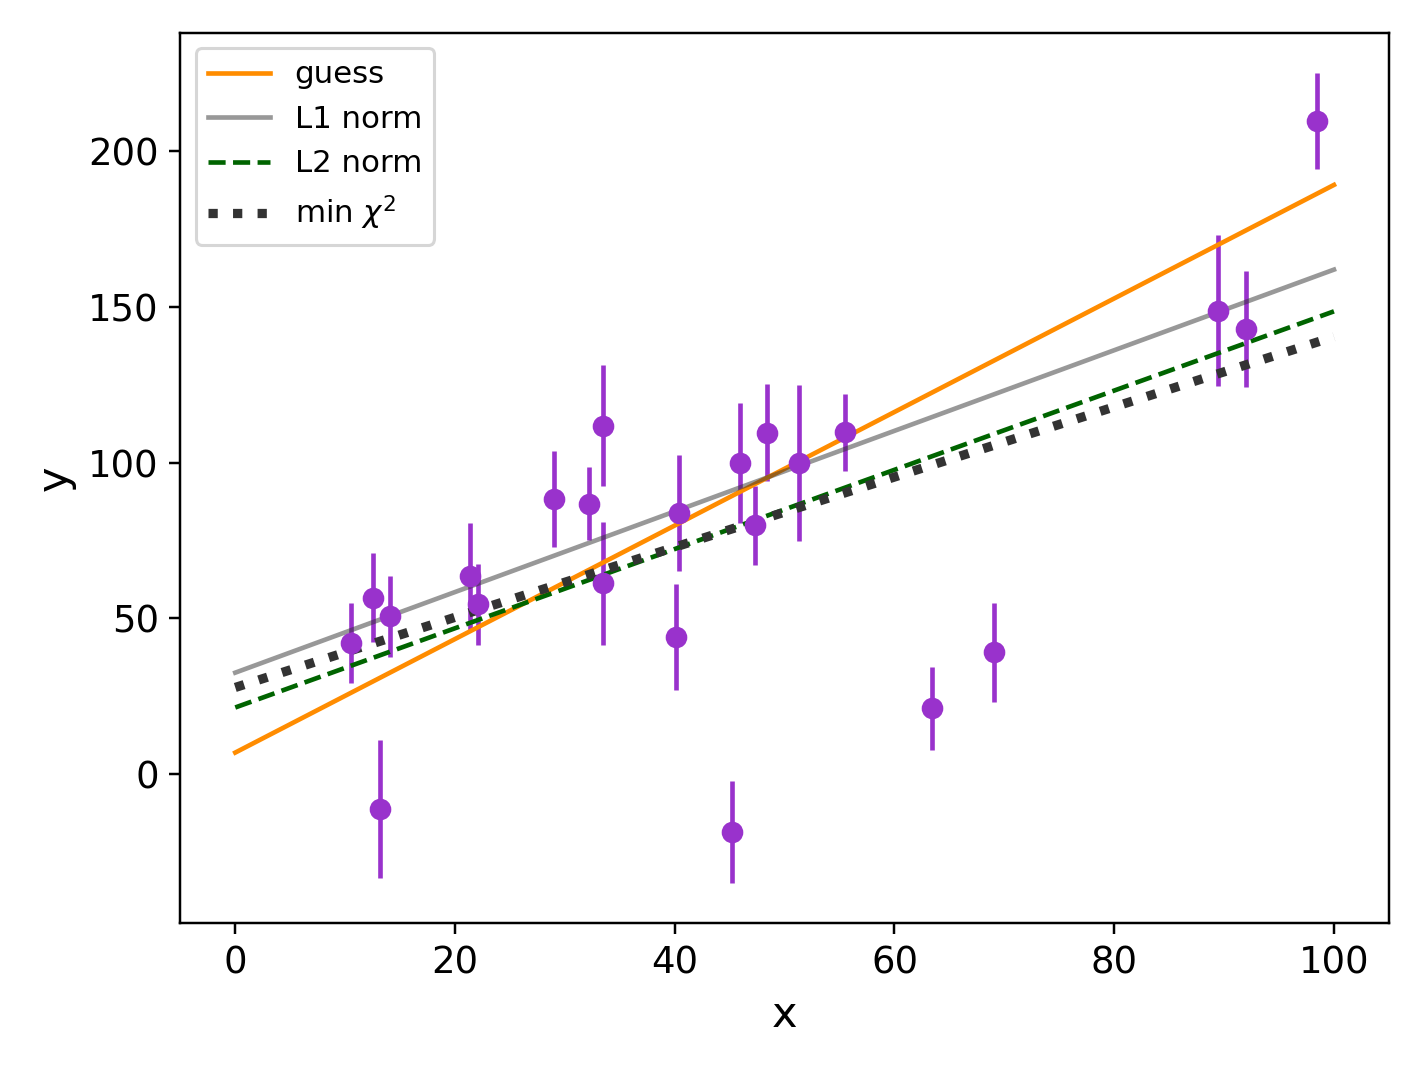

In [130]:
# minimize chi^2
def l2(theta, x, y, y_unc):
    m, b = theta
    return sum((np.abs(y - (m*x + b))/y_unc)**2)

res_chi2 = minimize(l2, (1, 20), (x_obs, y_obs, y_unc))

fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')

ax.plot([0,100], [b_guess, b_guess + 100*m_guess], 
        color='DarkOrange', label='guess')
ax.plot([0,100], [res_l1.x[1], res_l1.x[1] + 100*res_l1.x[0]], 
        color='0.2', alpha=0.5, label='L1 norm')
ax.plot([0,100], [res_l2.x[1], res_l2.x[1] + 100*res_l2.x[0]], 
        color='DarkGreen',ls='--', label='L2 norm')
ax.plot([0,100], [res_chi2.x[1], res_chi2.x[1] + 100*res_chi2.x[0]], 
        color='0.2',ls=':', label=r'min $\chi^2$', lw=3)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend()
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/minChi2.png')

<IPython.core.display.Javascript object>


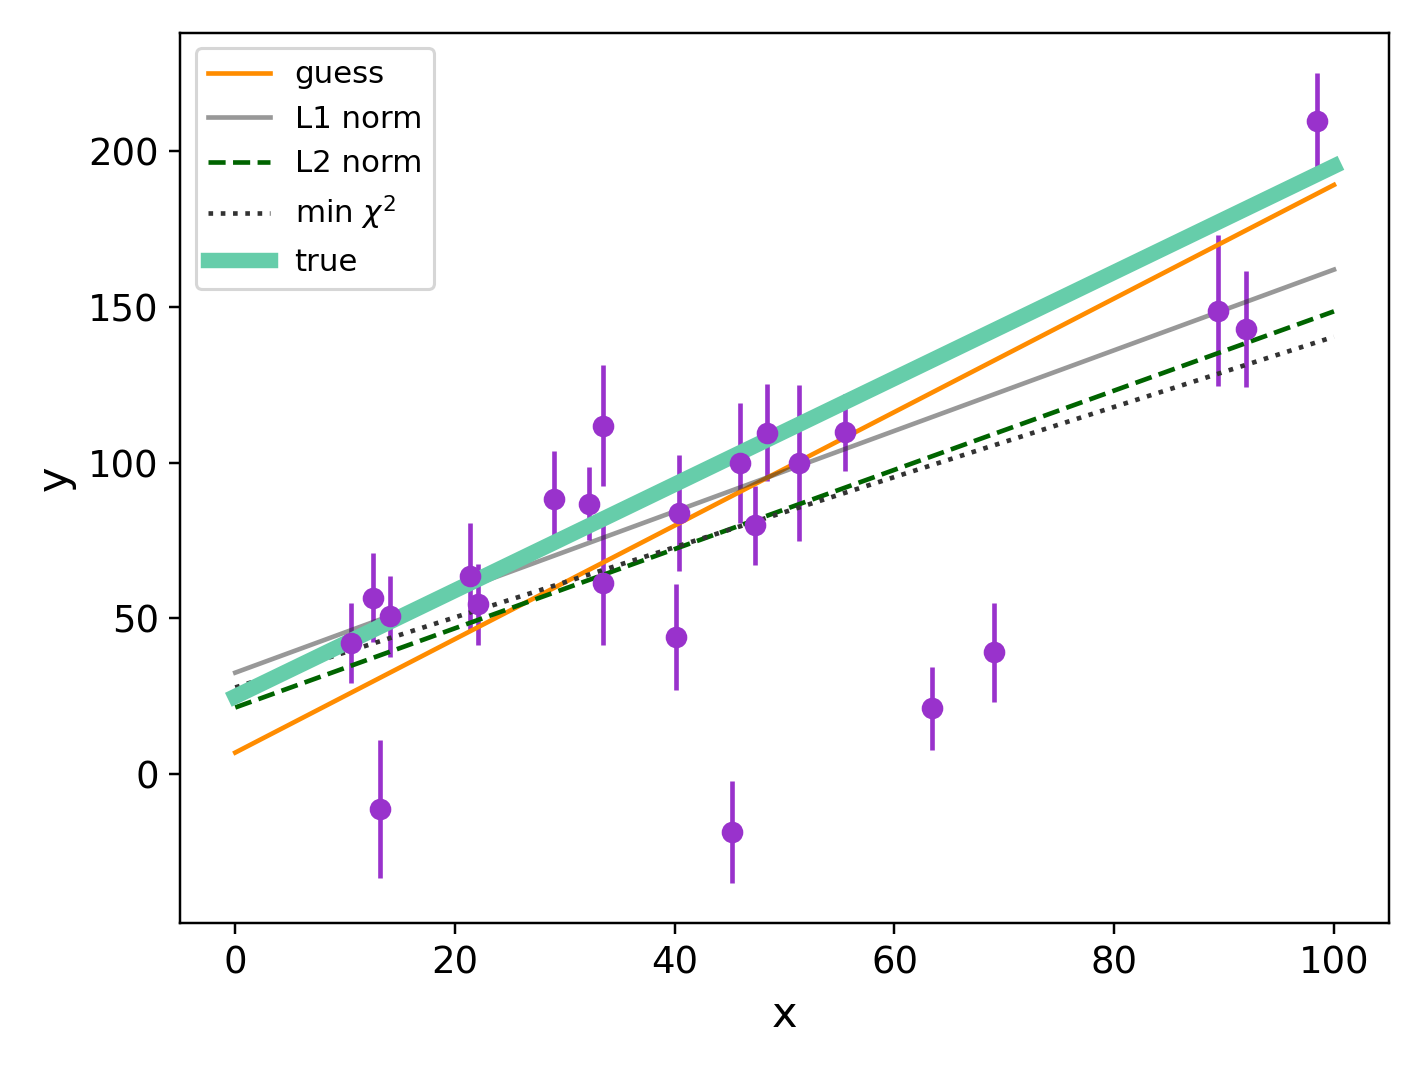

In [132]:
# true
def l2(theta, x, y, y_unc):
    m, b = theta
    return sum((np.abs(y - (m*x + b))/y_unc)**2)

res_chi2 = minimize(l2, (1, 20), (x_obs, y_obs, y_unc))

fig, ax = plt.subplots()
ax.errorbar(x, y_obs, y_unc, fmt='o', color='DarkOrchid')

ax.plot([0,100], [b_guess, b_guess + 100*m_guess], 
        color='DarkOrange', label='guess')
ax.plot([0,100], [res_l1.x[1], res_l1.x[1] + 100*res_l1.x[0]], 
        color='0.2', alpha=0.5, label='L1 norm')
ax.plot([0,100], [res_l2.x[1], res_l2.x[1] + 100*res_l2.x[0]], 
        color='DarkGreen',ls='--', label='L2 norm')
ax.plot([0,100], [res_chi2.x[1], res_chi2.x[1] + 100*res_chi2.x[0]], 
        color='0.2',ls=':', label=r'min $\chi^2$')

ax.plot([0,100], [b_true, b_true + 100*m_true], 
        color='MediumAquaMarine', label='true', lw=5)


ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend()
ax.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.savefig('./images/true.png')